In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt  # for graphing our mean rewards over time
import pickle  # to save/load Q-Tables
from matplotlib import style  # to make pretty charts because it matters.
import time  # using this to keep track of our saved Q-Tables.
from sklearn.metrics import f1_score
style.use("ggplot")  # setting our style!

In [2]:
# Fetching data
#data = pd.read_csv('drebinAndroidMalwareDetectionDataset.csv')
data = pd.read_csv('drebinAndroidDataset.csv')
print(data.shape)
data.head()

(15036, 216)


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [3]:
#Checking for null values in the dataset
data[data.columns[215]].isnull().value_counts()

False    15036
Name: class, dtype: int64

In [4]:
# Mark malware - '1' and non as - '0'
data=data.replace(["S","B"],[1,0])
data.rename(columns={'class':'MALWARE'},inplace=True)
print(data.shape)
data.head()

(15036, 216)


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,MALWARE
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [5]:
#Shuffle the dataset
data = shuffle(data)
print(data.shape)
data.head()

(15036, 216)


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,MALWARE
2471,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7419,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0
1960,1,1,1,1,1,1,1,0,0,0,...,1,0,0,0,1,1,0,0,1,1
12260,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
9519,1,0,0,1,0,1,0,1,0,0,...,1,1,0,0,1,1,0,0,1,0


In [6]:
#Reading from Random Forest output
selected_features = []
myFile = open("rf.txt", "r")
for myLine in myFile:
    selected_features.append(int(myLine))
print(selected_features)    

[1, 2, 4, 5, 6, 7, 8, 9, 12, 20, 22, 30, 52, 68, 171]


In [7]:
#Working with first 15 features
X = data.iloc[:, selected_features].values
Y = data.iloc[:, -1].values
print(X.shape)
print(X)
print(Y.shape)
print(Y)

(15036, 15)
[[0 0 0 ... 1 0 0]
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 0 0]]
(15036,)
[1 0 1 ... 0 1 1]


In [8]:
#Dividing the data set into 70% training and 30% testing data sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

print('X_train- ',X_train.shape)
print(X_train)
print('Y_train- ',Y_train.shape)
print(Y_train)
print('X_test- ',X_test.shape)
print(X_test)
print('Y_test- ',Y_test.shape)
print(Y_test)

X_train-  (10525, 15)
[[1 1 1 ... 1 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 0]]
Y_train-  (10525,)
[0 0 0 ... 0 1 1]
X_test-  (4511, 15)
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 1 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [1 1 1 ... 1 0 0]]
Y_test-  (4511,)
[1 0 0 ... 0 1 0]


In [9]:
X_SIZE = 10525
X_test_SIZE = 4511

In [10]:
# mapping each i to its combination
SIZE=15
x_table = {}
for i in range(X_SIZE):
    a = 0
    for j in range(SIZE):
        a = a*2 + int(X_train[i][j])   
    if a in x_table:
        x_table[a].append(i)
    else:
        x_table[a] = []
        x_table[a].append(i)
#print(f"x_table : {x_table}")

In [11]:
#declaring variables
HM_EPISODES = 100  # No of episodes
epsilon = 0.9
EPS_DECAY = 0.9998  # Every episode will be epsilon*EPS_DECAY
SHOW_EVERY = 25  
episode_rewards = []

start_q_table = None 

LEARNING_RATE = 0.00001
DISCOUNT = 0.95

In [12]:
def find_accuracy(q_table):
    correct = 0
    wrong = 0
    for i in range(X_test_SIZE):
        a = 0
        for j in range(SIZE):
            a = a*2 + int(X_test[i][j])   
        ans = int(np.argmax(q_table[a]))
        if ans == Y_test[i]:
            correct += 1
        else:
            wrong += 1
    accuracy = correct/(correct+wrong)
    #print(f"accuracy: {accuracy*100} %")
    return accuracy*100

In [13]:
def find_f_score(q_table):
    Y_predicted = []
    for i in range(4511):
            a = 0
            for j in range(SIZE):
                a = a*2 + int(X_test[i][j])   
            ans = int(np.argmax(q_table[a]))
            Y_predicted.append(ans)
    print(len(Y_predicted))  
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(Y_test, Y_predicted)
    #print('F1 score: %f' % f1)
    return f1

In [14]:
def action_fun(choice):
    if choice == 0:
        return 0
    elif choice == 1:
        return 1

In [15]:
def reward_fun(i,action):
    correct_reward = 1
    wrong_penalty = -1
    if i in x_table:
        select = x_table[i]
        select_i = select[np.random.randint(0, len(select))]
        if action == Y_train[select_i] :
            reward = correct_reward
        else:
            reward = wrong_penalty
        #print(f"reward on: {i} , at action: {action},select i : {select_i} at correct action: {Y_train[select_i]} is: {reward}")
        return reward    
    else:
        return  np.random.randint(-1, 1) 

In [16]:
# Q_table
def create_q_table(q_table):
    for i in range(0,pow(2,SIZE)):
        q_table[i] = (0,0)
    return q_table

In [19]:
accuracy_matrix = []
f_score_matrix = []
x_axis_matrix = []
final_q_table = {}
max_accuracy = 0
for itr in range(1,15):
    q_table = {}
    q_table = create_q_table(q_table)
    epsilon = 0.9
    LEARNING_RATE = LEARNING_RATE * 2.5
    print(f"On #{itr}, LEARNING_RATE is {LEARNING_RATE}")
    for episode in range(HM_EPISODES):
        if episode % SHOW_EVERY == 0:
            print(f"On #{episode}, epsilon is {epsilon}")
            print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")

        episode_reward = 0
        for i in range(0,pow(2,SIZE)):
            obs = i
            if np.random.random() > epsilon:
                # GET THE ACTION
                action = action_fun( int(np.argmax(q_table[i])) )
            else:
                action = action_fun( np.random.randint(0, 1) )
            reward = reward_fun(i,action)

            new_obs = (i+1)%pow(2,SIZE)
            max_future_q = np.max(q_table[new_obs])
            current_q = q_table[obs][action]
            if reward < 0:
                new_q = reward
            else:
                new_q = (1 - LEARNING_RATE) * current_q +  LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            temp = q_table[obs]
            if(action == 0):
                q_table[obs] = (new_q,temp[1])
            else:
                q_table[obs] = (temp[0],new_q)
            #print(f"q_table[obs]: {q_table[obs]}")  
            episode_reward += reward

        episode_rewards.append(episode_reward)
        epsilon *= EPS_DECAY  
    accuracy = find_accuracy(q_table)
    accuracy_matrix.append(accuracy) 
    f_score = find_f_score(q_table)
    f_score_matrix.append(f_score)
    x_axis_matrix.append(LEARNING_RATE)
    print(f"At Learning Rate: {LEARNING_RATE} -> accuracy: {accuracy} % , f1_score: {f_score}")
    if max_accuracy < accuracy:
        final_q_table = q_table
        max_accuracy = accuracy            

On #1, LEARNING_RATE is 6.25e-05
On #0, epsilon is 0.9
25 ep mean: -15815.96
On #25, epsilon is 0.8955107834582012
25 ep mean: -15836.28
On #50, epsilon is 0.8910439592110236
25 ep mean: -15853.88
On #75, epsilon is 0.8865994155652902
25 ep mean: -15812.76
4511
At Learning Rate: 6.25e-05 -> accuracy: 88.51695854577699 % , f1_score: 0.8226027397260273
On #2, LEARNING_RATE is 0.00015625
On #0, epsilon is 0.9
25 ep mean: -15824.24
On #25, epsilon is 0.8955107834582012
25 ep mean: -15835.16
On #50, epsilon is 0.8910439592110236
25 ep mean: -15818.92
On #75, epsilon is 0.8865994155652902
25 ep mean: -15838.84
4511
At Learning Rate: 0.00015625 -> accuracy: 88.5612946131678 % , f1_score: 0.82365003417635
On #3, LEARNING_RATE is 0.000390625
On #0, epsilon is 0.9
25 ep mean: -15822.32
On #25, epsilon is 0.8955107834582012
25 ep mean: -15838.36
On #50, epsilon is 0.8910439592110236
25 ep mean: -15856.48
On #75, epsilon is 0.8865994155652902
25 ep mean: -15832.16
4511
At Learning Rate: 0.00039062

In [20]:
print(x_axis_matrix)

[6.25e-05, 0.00015625, 0.000390625, 0.0009765625, 0.00244140625, 0.006103515625, 0.0152587890625, 0.03814697265625, 0.095367431640625, 0.2384185791015625, 0.5960464477539062, 1.4901161193847656, 3.725290298461914, 9.313225746154785]


In [21]:
print(accuracy_matrix)

[88.51695854577699, 88.5612946131678, 91.28796275770338, 87.51939702948349, 88.07359787186877, 84.32720017734428, 90.04655287076037, 84.90356905342496, 84.85923298603414, 88.27311017512747, 86.32232320993128, 56.705830192861896, 29.30614054533363, 43.18332963866105]


In [22]:
print(f_score_matrix)

[0.8226027397260273, 0.82365003417635, 0.8730210016155089, 0.8036274851761422, 0.8143547273982057, 0.7405504587155962, 0.8507809903622465, 0.7621376178833391, 0.7522669568371417, 0.8281909710945111, 0.7849424886720111, 0.36197321136883376, 0.0339291123901848, 0.07706157724162765]


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [24]:
Y_predicted = []
for i in range(4511):
        a = 0
        for j in range(SIZE):
            a = a*2 + int(X_test[i][j])   
        ans = int(np.argmax(final_q_table[a]))
        Y_predicted.append(ans)
print(len(Y_predicted))        

4511


In [25]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_predicted)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_predicted)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_predicted)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_predicted)
print('F1 score: %f' % f1)

# confusion matrix
matrix = confusion_matrix(Y_test, Y_predicted)
print(matrix)

Accuracy: 0.912880
Precision: 0.967765
Recall: 0.795174
F1 score: 0.873021
[[2767   45]
 [ 348 1351]]


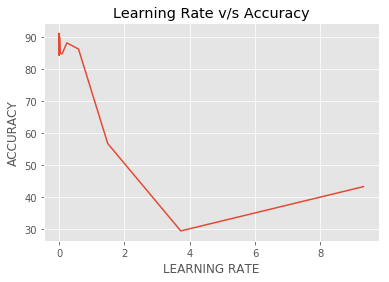

In [26]:
plt.plot(x_axis_matrix, accuracy_matrix) 
  
# naming the x axis 
plt.xlabel('LEARNING RATE') 
# naming the y axis 
plt.ylabel('ACCURACY') 
  
# giving a title to my graph 
plt.title('Learning Rate v/s Accuracy') 
  
# function to show the plot 
plt.show() 